In [84]:
import os
import time
import itertools 

In [85]:
def load_data(filename):
    file = open(filename, 'r')
    
    # list containing baskets as list of lists [[1st basket],[2nd basket]]
    baskets = []
    for line in file: 
        basket = line.split(' ')
        basket.remove('\n')
        basket = list(map(int, basket))
        baskets.append(basket)
        
    return baskets

In [86]:
def load_data_slide(filename):
    file = open(filename, 'r')
    
    # list containing baskets as list of lists [[1st basket],[2nd basket]]
    baskets = []
    for line in file: 
        basket = line.split(' ')
        basket = list(map(int, basket))
        baskets.append(basket)
        
    return baskets

In [87]:
# generate C1
def generate_candidates(baskets):

    candidates = {}

    for basket in baskets:
        for items in basket:
            if candidates.get(items) == None:
                    candidates[items] = 1
            else:
                candidates[items] += 1


    return candidates

In [88]:
# generate C2 -> NAIVE SOLUTION
def generate_candidates_2(frequent_items, baskets):

    items = sorted(frequent_items.keys())
    couples = list(itertools.combinations(items, 2))
    # print("couples: ", couples)

    C2 = {}

    for basket in baskets:
        for couple in couples:
            if all(item in basket for item in couple):
                if C2.get(couple) == None:
                    C2[couple] = 1
                else: 
                    C2[couple] += 1
                    
    return C2

In [89]:
# # generate C2 - no occ
# def generate_candidates_C20(frequent_items):

#     items = sorted(frequent_items.keys())
#     couples = list(itertools.combinations(items, 2))
#     # print("couples: ", couples)

#     C2 = {}

#     for couple in couples:
#         C2[couple] = 0

#     return C2

In [90]:
# # integrate occurences
# def generate_occurences(frequent_items, baskets, k_tuple):

#     Ck = {}
    
#     items = sorted(frequent_items.keys())
    
#     for basket in baskets:
#         basket_combinations = itertools.combinations(sorted(basket), k_tuple)
#         for combination in basket_combinations:
#             if combination in items:
#                 if Ck.get(combination) == None:
#                     Ck[combination] = 1
#                 else:
#                     Ck[combination] += 1
   
#     return Ck

In [91]:
def generate_candidates_Ck(frequent_items, baskets, k_tuple):

    items = sorted(frequent_items.keys())
    Ck = {}
    
    for basket in baskets:
        basket = set(basket)
        common_elements = basket.intersection(set(items))
        itemsets = list(itertools.combinations(sorted(common_elements), k_tuple))
        
        for itemset in itemsets:
            if Ck.get(itemset) == None:
                Ck[itemset] = 1
            else: 
                Ck[itemset] += 1
    return Ck

In [92]:
def generate_candidates_Ckn(frequent_items, baskets, k_tuple):

    #items = set(itertools.chain(*frequent_items.keys()))
    items = [item for sublist in frequent_items.keys() for item in sublist]

    Ck = {}
    
    for basket in baskets:
        basket = set(basket)
        common_elements = basket.intersection(set(items))
        itemsets = list(itertools.combinations(sorted(common_elements), k_tuple))
        
        for itemset in itemsets:
            if Ck.get(itemset) == None:
                Ck[itemset] = 1
            else: 
                Ck[itemset] += 1
    return Ck

In [93]:
def generate_candidates_Ckn_mod(frequent_items, baskets, k_tuple):

    #items = set(itertools.chain(*frequent_items.keys()))
    items = [item for sublist in frequent_items.keys() for item in sublist]
    lk_1_items = list(frequent_items.keys())
    
    Ck = {}
    
    for basket in baskets:
        basket = set(basket)
        common_elements = basket.intersection(set(items))
        itemsets = list(itertools.combinations(sorted(common_elements), k_tuple))
                
        for itemset in itemsets:
            combinations = list(itertools.combinations(itemset, 2))            
            if all(item in lk_1_items for item in combinations):
                if Ck.get(itemset) is None:
                    Ck[itemset] = 1
                else: 
                    Ck[itemset] += 1
    return Ck

In [104]:
def generate_candidates_Ckn_mod_adv(frequent_items, baskets, k_tuple):

    #items = set(itertools.chain(*frequent_items.keys()))
    items = [item for sublist in frequent_items.keys() for item in sublist]
    lk_1_items = list(frequent_items.keys())
    
    Ck = {}
    
    for basket in baskets:
        basket = set(basket)
        common_elements = basket.intersection(set(items))
        itemsets = list(itertools.combinations(sorted(common_elements), k_tuple))
                
        for itemset in itemsets:
            combinations = list(itertools.combinations(itemset, 2))
            combinations = set(combinations)
            check_combinations = combinations.intersection(set(lk_1_items))
            
            if (check_combinations == combinations):
                if Ck.get(itemset) is None:
                    Ck[itemset] = 1
                else: 
                    Ck[itemset] += 1
    return Ck

In [94]:
# input L2, L1 -> generate C3
def generate_candidates_3(frequent_items, singletons_items, baskets):
    
    C3 = {}
    
    singletons = sorted(list(singletons_items.keys()))
    items = list(frequent_items.keys())
    
    #print(items)
    #print(singletons)
    
    # ciclo su ogni item di L2 e su ogni item di L1, se l'elemento di L1 non è in L2 allora
    # creo la tripletta. Dopo controllo che ogni combinazione (subset) di 2 elementi della tripletta
    # sia presente in L2 per rispettare la regola, se si piazzo in C3 con count = 0.
    # funzione del count da fare a sè così da diminuire anche il carico di C2
    candidate = []
    for item in items:
        for singleton in singletons:
            if singleton not in item:
                candidate = list(item)
                candidate.append(singleton)
                #print(candidate)
                cand_comb = list(itertools.combinations(sorted(candidate),2))
                for comb in cand_comb:
                    if all(item in items for item in cand_comb):
                        C3[tuple(candidate)] = 0
                candidate.clear()
                
    end = time.time()
    #print(C3)
    return C3
            

In [95]:
def filter_candidates(candidates, support):

    frequent_items = {}
    for item, occurences in list(candidates.items()):
        if (occurences >= support):
            frequent_items[item] = occurences

    return frequent_items

In [96]:
filename = '../data/T10I4D100K.dat'
baskets = load_data(filename)

start = time.time()
C1 = generate_candidates(baskets)
end = time.time()
print("Time C1: ", end-start)

start = time.time()
L1 = filter_candidates(C1, 5000)
end = time.time()
print("Time L1: ", end-start)

start = time.time()
C2 = generate_candidates_2(L1, baskets)
end = time.time()
print("Time C2 ", end-start)

print(C2)

start = time.time()
L2 = filter_candidates(C2, 500)
end = time.time()
print("Time L2 ", end-start)

start = time.time()
C3 = generate_candidates_3(L2, L1, baskets)
end = time.time()
print("Time C3 ", end-start)
print(C3)

Time C1:  0.24896502494812012
Time L1:  0.00024199485778808594
Time C2  2.471842050552368
{(217, 529): 403, (217, 766): 276, (419, 722): 366, (354, 684): 219, (529, 829): 584, (684, 829): 349, (494, 829): 267, (368, 419): 355, (368, 829): 1194, (419, 829): 259, (368, 529): 640, (368, 766): 504, (354, 529): 301, (684, 766): 613, (368, 722): 392, (354, 368): 319, (529, 684): 334, (217, 494): 183, (217, 354): 280, (368, 494): 860, (354, 419): 263, (354, 722): 566, (494, 766): 227, (722, 766): 328, (217, 829): 275, (419, 684): 155, (217, 368): 303, (368, 684): 387, (722, 829): 294, (217, 722): 498, (354, 829): 259, (354, 766): 329, (217, 419): 344, (419, 766): 238, (684, 722): 443, (354, 494): 189, (494, 529): 225, (766, 829): 321, (529, 766): 317, (494, 684): 208, (529, 722): 283, (217, 684): 198, (494, 722): 226, (419, 494): 176, (419, 529): 252}
Time L2  6.008148193359375e-05
Time C3  0.0002510547637939453
{(529, 829, 368): 0, (368, 829, 529): 0, (368, 529, 829): 0}


In [105]:
filename = '../data/slide.dat'
baskets = load_data_slide(filename)

start = time.time()
C1 = generate_candidates(baskets)
end = time.time()
print("Time C1: ", end-start)

start = time.time()
L1 = filter_candidates(C1, 2)
end = time.time()
print("Time L1: ", end-start)

start = time.time()
Ck = generate_candidates_Ck(L1, baskets, 2)
end = time.time()
print("Time Ck=2 ", end-start)
print(Ck)

start = time.time()
L2 = filter_candidates(Ck, 2)
end = time.time()
print("Time L2 ", end-start)
print(L2)

start = time.time()
C3 = generate_candidates_Ckn_mod_adv(L2, baskets, 3)
end = time.time()
print("Time C3 ", end-start)
print(C3)

Time C1:  8.296966552734375e-05
Time L1:  9.703636169433594e-05
Time Ck=2  0.00010085105895996094
{(1, 3): 2, (2, 3): 2, (2, 5): 3, (3, 5): 2, (1, 2): 1, (1, 5): 1}
Time L2  0.00011801719665527344
{(1, 3): 2, (2, 3): 2, (2, 5): 3, (3, 5): 2}
Time C3  0.0001049041748046875
{(2, 3, 5): 2}


In [135]:
filename = '../data/T10I4D100K.dat'
baskets = load_data(filename)

start = time.time()
C1 = generate_candidates(baskets)
end = time.time()
print("Time C1: ", end-start)

start = time.time()
L1 = filter_candidates(C1, 1000)
end = time.time()
print("Time L1: ", end-start)
print(len(L1.keys()))

start = time.time()
Ck = generate_candidates_Ck(L1, baskets, 2)
end = time.time()
print("Time Ck=2 ", end-start)

start = time.time()
L2 = filter_candidates(Ck, 1000)
end = time.time()
print("Time L2 ", end-start)
print(len(L2.keys()))

start = time.time()
C3 = generate_candidates_Ckn_mod_adv(L2, baskets, 3)
end = time.time()
print("Time C3 ", end-start)

start = time.time()
L3 = filter_candidates(C3, 1000)
end = time.time()
print("Time L3: ", end-start)
print(len(L3.keys()))

size = [0]
size.append(len(L1.keys()))
size.append(len(L2.keys()))
size.append(len(L3.keys()))

candidat = [0]
candidat.append(len(C1.keys()))
candidat.append(len(C2.keys()))
candidat.append(len(C3.keys()))

stage = [0,1,2,3]

Time C1:  0.22855615615844727
Time L1:  0.00027108192443847656
375
Time Ck=2  2.577099084854126
Time L2  0.01299595832824707
9
Time C3  0.22626018524169922
Time L3:  6.890296936035156e-05
1


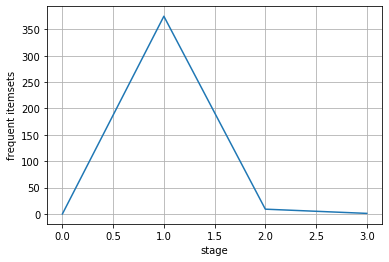

In [136]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.array(stage), np.array(size))
plt.ylabel("frequent itemsets")
plt.xlabel("stage")
plt.grid()
plt.show()

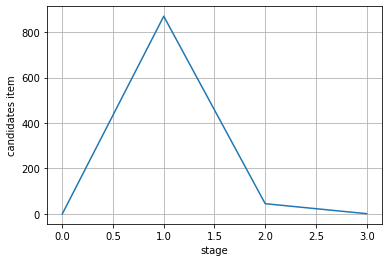

In [137]:
plt.plot(np.array(stage), np.array(candidat))
plt.ylabel("candidates item")
plt.xlabel("stage")
plt.grid()
plt.show()

### TODO fare funziona unica (con 4 stage o far decidere utente o finchè non arriva a zero) + Parser
### TODO spostare fuori dal notebook (?) -> A me piace così
### TODO grafico del tempo
### TODO report